In [891]:
# Project: Bankruptcy Prevention

# Business Objective:

# This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
# The data file contains 7 features about 250 companies
# The data set includes the following variables:
# 1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
# 4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
# 5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
# 6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 7. class: bankruptcy, non-bankruptcy (target variable).
# Acceptance Criterion:
# Need to deploy the end results using Flask /Streamlit.etc.

In [892]:
# Project group 5:
# 1.Sakshi Parab
# 2.Dhanya N
# 3.Suyash Dahale
# 4.Asad Ansar SK
# 5.Rohini Weldode
# 6.Yash Shirgaonkar
# 7.Niranjan L

# Importing libraries

In [890]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [889]:
from google.colab import files
upload = files.upload()

Saving bankruptcy-prevention (2).csv to bankruptcy-prevention (2) (7).csv


# Loading Dataset

In [893]:
bankrupt = pd.read_csv("bankruptcy-prevention (2).csv",sep = ";",header = 0)
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# Performing EDA

## Dropping unnamed columns

In [894]:
bankrupt = bankrupt.loc[:, ~bankrupt.columns.str.contains('^Unnamed')]
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


## Checking if dataset contains duplicate values

In [895]:
bankrupt[bankrupt.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### Conclusion:There are 147 rows which consists of duplicate values.

In [896]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Conclusion:Most data of all columns is between 0 to 1.

## Checking shape of dataset

In [897]:
print(bankrupt.shape)

(250, 7)


### Conclusion:Dataset consists of 250 rows and 7 columns.

## Checking if null values are present in dataset

In [898]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

### Conclusion:No null values are present in dataset.

## Creating new target column

In [899]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new
bankrupt_new["class_y/n"] = 0
bankrupt_new
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_y/n'] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_y/n
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,0
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,0
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,0
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,0


## Dropping existing target column

In [900]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_y/n
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


## Checking if there is corellation between features and target column.

In [901]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_y/n
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
class_y/n,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


### Conclusion:We can see that there is strong negative corellation between feature columns financial_flexibility,credibility and competitiveness with target column.

## Visualization

## Checking if there is corellation between feature and target column visually

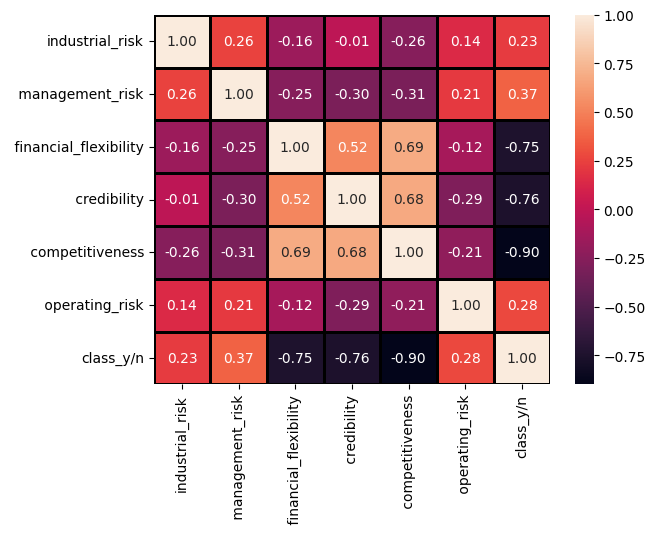

In [902]:
sns.heatmap(bankrupt_new.corr(), annot=True, fmt='.2f', linecolor='black', linewidths=1)
plt.show()

### Conclusion:Feature columns Financial flexibility,credibility and competitiveness have strong negative corellation with target column class_y/n.

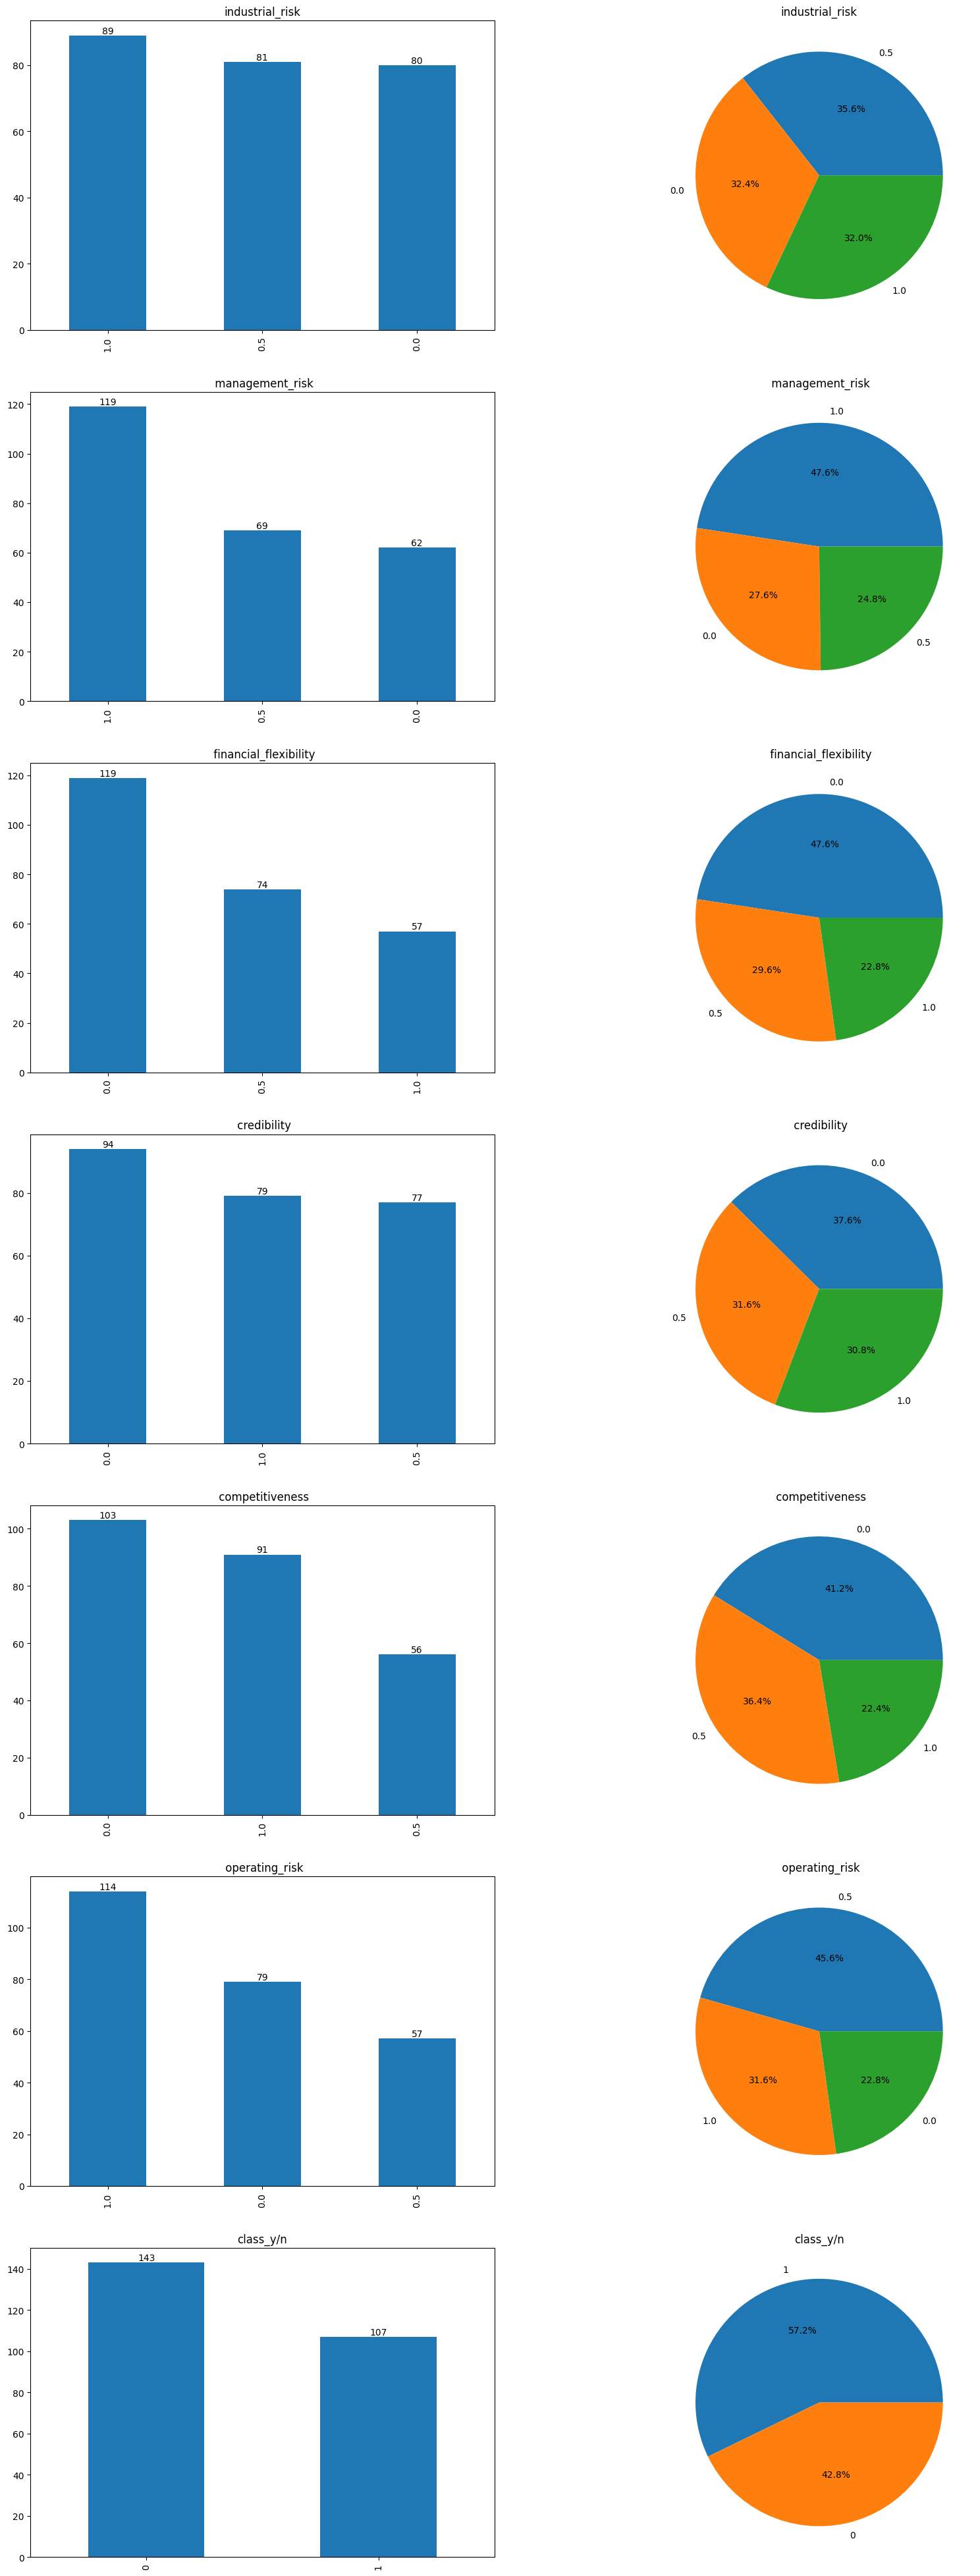

In [903]:
fig, axs = plt.subplots(7,2, figsize=(20,50))
for i,ax in  enumerate(axs.flatten()):
        if i%2 == 0:
            j = int(i/2)
            a = bankrupt_new[bankrupt_new.columns[j]].value_counts().plot(kind='bar',ax=ax)
            a.bar_label(a.containers[0])
            ax.title.set_text(bankrupt_new.columns[j])
        else:
            ax.pie(bankrupt_new[bankrupt_new.columns[j]].value_counts(),autopct='%0.1f%%',labels=bankrupt_new[bankrupt_new.columns[j]].unique())
            ax.title.set_text(bankrupt_new.columns[j])
plt.show()

### Conclusion:We can see the distribution of values 0,0.5 and 1 in our dataset from above bar graphs and pie charts.

<Axes: xlabel='industrial_risk'>

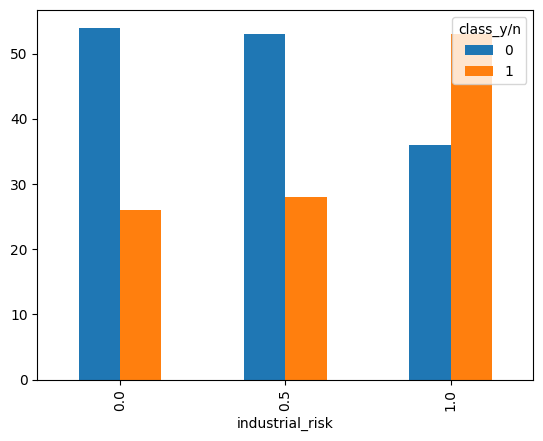

In [904]:
pd.crosstab(bankrupt_new['industrial_risk'], bankrupt_new['class_y/n']).plot(kind='bar')

### Conclusion:Banks with high industrial risk have high risk of bankruptcy.

<Axes: xlabel=' financial_flexibility'>

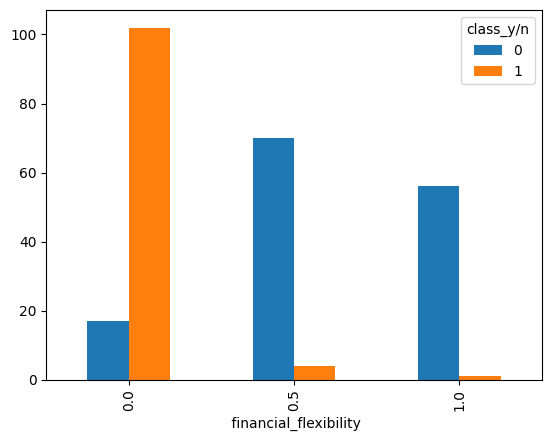

In [905]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_y/n']).plot(kind = 'bar')

### Conclusion:Banks which have low financial flexibility have high risk of bankruptcy.

<Axes: xlabel=' credibility'>

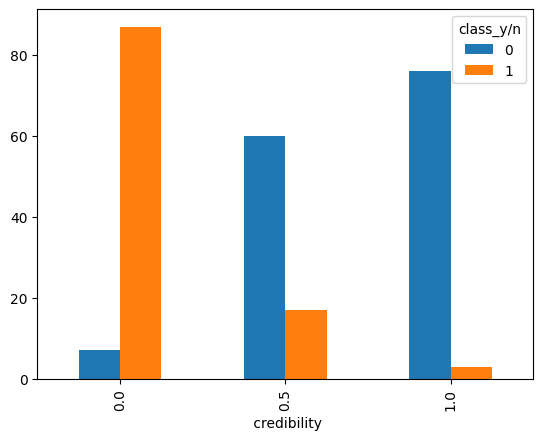

In [906]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new['class_y/n']).plot(kind = 'bar')

### Conclusion:Banks which have low credibility have high risk of bankruptcy.

<Axes: xlabel=' operating_risk'>

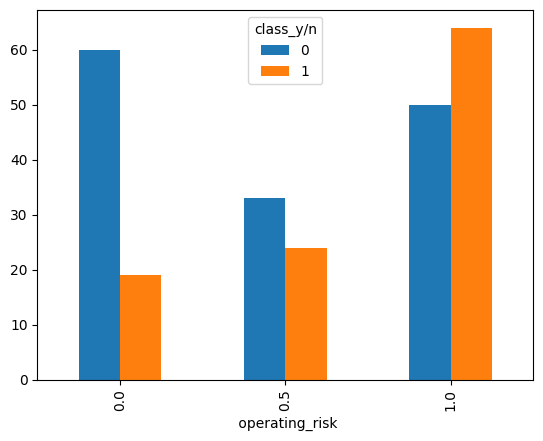

In [907]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new['class_y/n']).plot(kind='bar')

### Conclusion:Banks with  high operating risk value have high risk of bankruptcy.

<Axes: xlabel=' management_risk'>

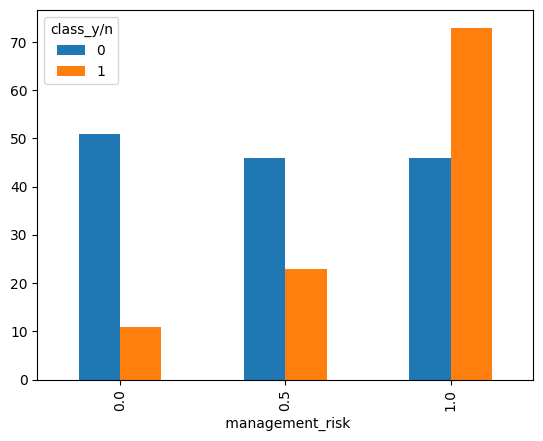

In [908]:
pd.crosstab(bankrupt_new[' management_risk'], bankrupt_new['class_y/n']).plot(kind='bar')

### Conclusion:Banks with high management risk have high risk of bankruptcy.

# Model building

## Model 1 : KNN

### Defining x and y values

In [909]:
x = bankrupt_new.iloc[:,:-1]
y = bankrupt_new.iloc[:,-1]

### Splitting data into train and test

In [910]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

### Importing libraries

In [911]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

### Choosing k value

In [912]:
import math
math.sqrt(len(y_test))

7.937253933193772

#### Conclusion:We choose k value to be 7.

### Defining the model

In [913]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

### Fitting the model

In [914]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

### Predicting values

In [915]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

### Evaluating the model

In [916]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36  1]
 [ 0 26]]


#### Conclusion:Our created model is predicting 36 values of positive(1) correctly and only 1 value of positive(1) incorrectly and 0 values of negative(0) incorrectly and 26 values of negative(0) correctly.

### Checking accuracy of created model

In [917]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9841269841269841

#### Conclusion:Our created model is 98% accurate.

## Model 2 : SVM

### Importing libraries

In [918]:
from sklearn.svm import SVC

### Defining the model

In [919]:
clf = SVC(kernel='linear',random_state=0)

### Fitting the model

In [920]:
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting values

In [921]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

### Evaluating the model

In [922]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  0]
 [ 0 26]]


#### Conclusion:Our created model is predicting all values of positive(1) and negative(0) correctly.

### Checking accuracy of created model

In [923]:
clf_acc = accuracy_score(y_test, y_pred)
clf_acc

1.0

#### Conclusion:Our created model is 100% accurate.

## Model 3: Naive Bayes

### Importing necessary Libraries

In [924]:
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix, accuracy_score

### Multinomial Model

In [925]:
M_model = naive_bayes.MultinomialNB()
M_model.fit(x_train, y_train)
pred_M_model = M_model.predict(x_train)
confusion_matrix(y_train, pred_M_model)

array([[106,   0],
       [  6,  75]])

<b>Conclusion: Our created model is predicting 106 values of positive(1) correctly and 0 value of positive(1) incorrectly and only 6 values of negative(0) incorrectly and 75 values of negative(0) correctly.</b>

In [926]:
M_acc = accuracy_score(y_train, pred_M_model)
M_acc

0.9679144385026738

<b>Accuracy Score is 96.79 %.</b>

### Gaussian Model

In [927]:
G_model = naive_bayes.GaussianNB()
G_model.fit(x_train, y_train)
pred_G_model = G_model.predict(x_train)
confusion_matrix(y_train, pred_G_model)

array([[106,   0],
       [  5,  76]])

<b>Conclusion: Our created model is predicting 106 values of positive(1) correctly and 0 value of positive(1) incorrectly and only 5 values of negative(0) incorrectly and 76 values of negative(0) correctly.</b>

In [928]:
G_acc = accuracy_score(y_train, pred_G_model)
G_acc

0.9732620320855615

<b>Accuracy Score is 97.32 %.</b>

### Categorial Model

In [929]:
C_model = naive_bayes.CategoricalNB()
C_model.fit(x_train, y_train)
pred_C_model = C_model.predict(x_train)
confusion_matrix(y_train, pred_C_model)

array([[89, 17],
       [ 2, 79]])

<b>Conclusion: Our created model is predicting 89 values of positive(1) correctly and 17 value of positive(1) incorrectly and only 5 values of negative(0) incorrectly and 76 values of negative(0) correctly.</b>

In [930]:
C_acc = accuracy_score(y_train, pred_C_model)
C_acc

0.8983957219251337

<b>Accuracy Score is 89.83 %.</b>

### Bernoulli's Model

In [931]:
B_model = naive_bayes.BernoulliNB()
B_model.fit(x_train, y_train)
pred_B_model = B_model.predict(x_train)
confusion_matrix(y_train, pred_B_model)

array([[105,   1],
       [  1,  80]])

<b>Conclusion: Our created model is predicting 105 values of positive(1) correctly and 1 value of negative(0) incorrectly and only 1 values of negative(0) incorrectly and 80 values of negative(0) correctly.</b>

In [932]:
B_acc = accuracy_score(y_train, pred_B_model)
B_acc

0.9893048128342246

<b>Accuracy Score is 98.93 %.</b>

### Complement Model

In [933]:
Com_model = naive_bayes.ComplementNB()
Com_model.fit(x_train, y_train)
pred_Com_model = Com_model.predict(x_train)
confusion_matrix(y_train, pred_Com_model)

array([[106,   0],
       [  1,  80]])

<b>Conclusion: Our created model is predicting 106 values of positive(1) correctly and 0 value of negative(0) incorrectly and only 1 values of negative(0) incorrectly and 80 values of negative(0) correctly.</b>

In [934]:
Com_acc = accuracy_score(y_train, pred_Com_model)
Com_acc

0.9946524064171123

<b>Accuracy Score is 99.46 %.</b>

### Creating Dataframe containing all Accuracy Scores

In [935]:
acc_data = [['Multinomial',M_acc],['Gaussian',G_acc],['Categorical',C_acc],['Bernoulli',B_acc],['Complement',Com_acc]]
pd.DataFrame(acc_data, columns=['Model_Name','Accuracy'])

,Model_Name,Accuracy
0,Multinomial,0.967914
1,Gaussian,0.973262
2,Categorical,0.898396
3,Bernoulli,0.989305
4,Complement,0.994652


#### As we can see above the best predictions are made by the Complement Model, So we will go ahead with Complement Model.

### Testing on Test Data with Naive Bayes Complement Model.

In [936]:
Com_model = naive_bayes.ComplementNB()
Com_model.fit(x_train, y_train)
pred_Com_model = Com_model.predict(x_test)
confusion_matrix(y_test, pred_Com_model)

array([[37,  0],
       [ 0, 26]])

<b>Conclusion: Our created model is predicting 37 values of positive(1) correctly and 0 value of negative(0) incorrectly and only 0 values of negative(0) incorrectly and 26 values of negative(0) correctly.</b>

In [937]:
accuracy_score(y_test, pred_Com_model)

1.0

<b> We have 100 % Accuracy.</b>

## Model 4: Logistic Regression

### Importing necessary Libraries

In [938]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Defining the model

In [939]:
logisticlassifier = LogisticRegression()

### Fitting the model

In [940]:
logisticlassifier.fit(x_train, y_train)

LogisticRegression()

### Prediction on test data

In [941]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

### Performance of our model - confusion matrix

In [942]:
confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist

array([[37,  0],
       [ 0, 26]])

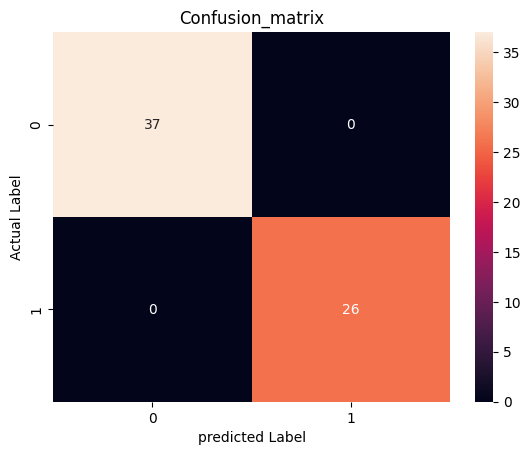

In [943]:
sns.heatmap(confusion_logist, annot =True)
plt.xlabel("predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion_matrix")
plt.show()

#### Conclusion:Our created model is predicting all values of positive(1) and negative(0) correctly.

### Accuracy of  Model

In [944]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

#### Conclusion:Our created model is 100% accurate.

## Model 5 : Decision tree

### Defining x and y values

In [945]:
X = bankrupt_new.iloc[:,:-1]
y = bankrupt_new.iloc[:,-1]

### Splitting data into train and test

In [946]:
from sklearn.model_selection import train_test_split

In [947]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

### Importing libraries

In [948]:
from sklearn.tree import DecisionTreeClassifier

### Defining the model

In [949]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=4)

### Fitting the model

In [950]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=4)

In [951]:
from sklearn import tree

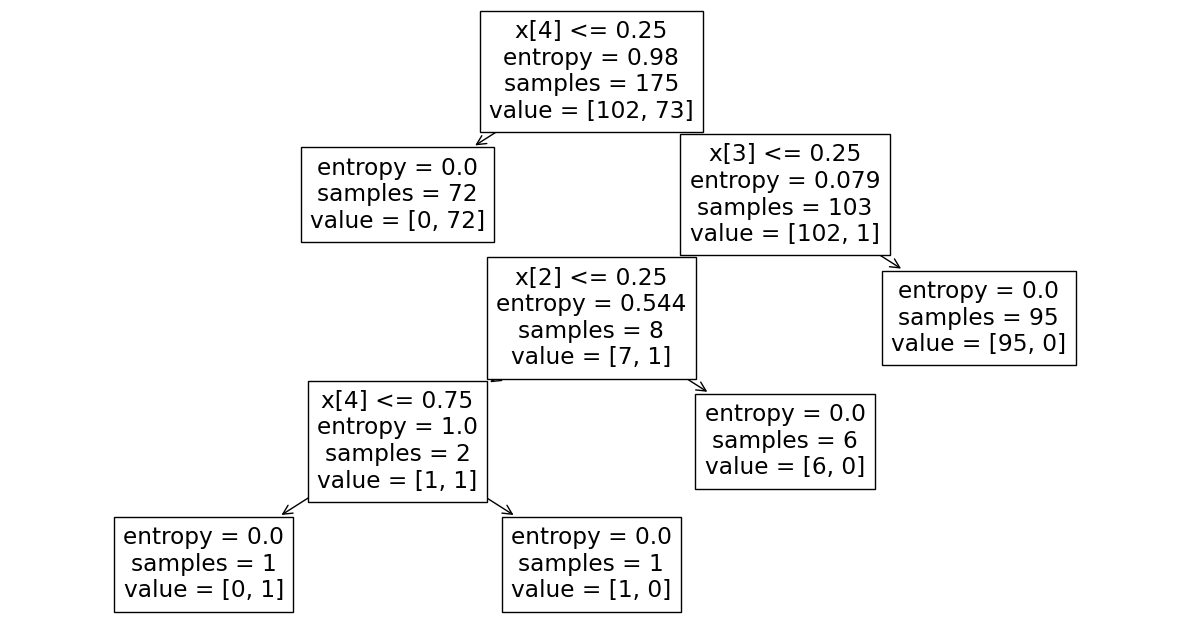

In [952]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt);
#builds a decision tree model

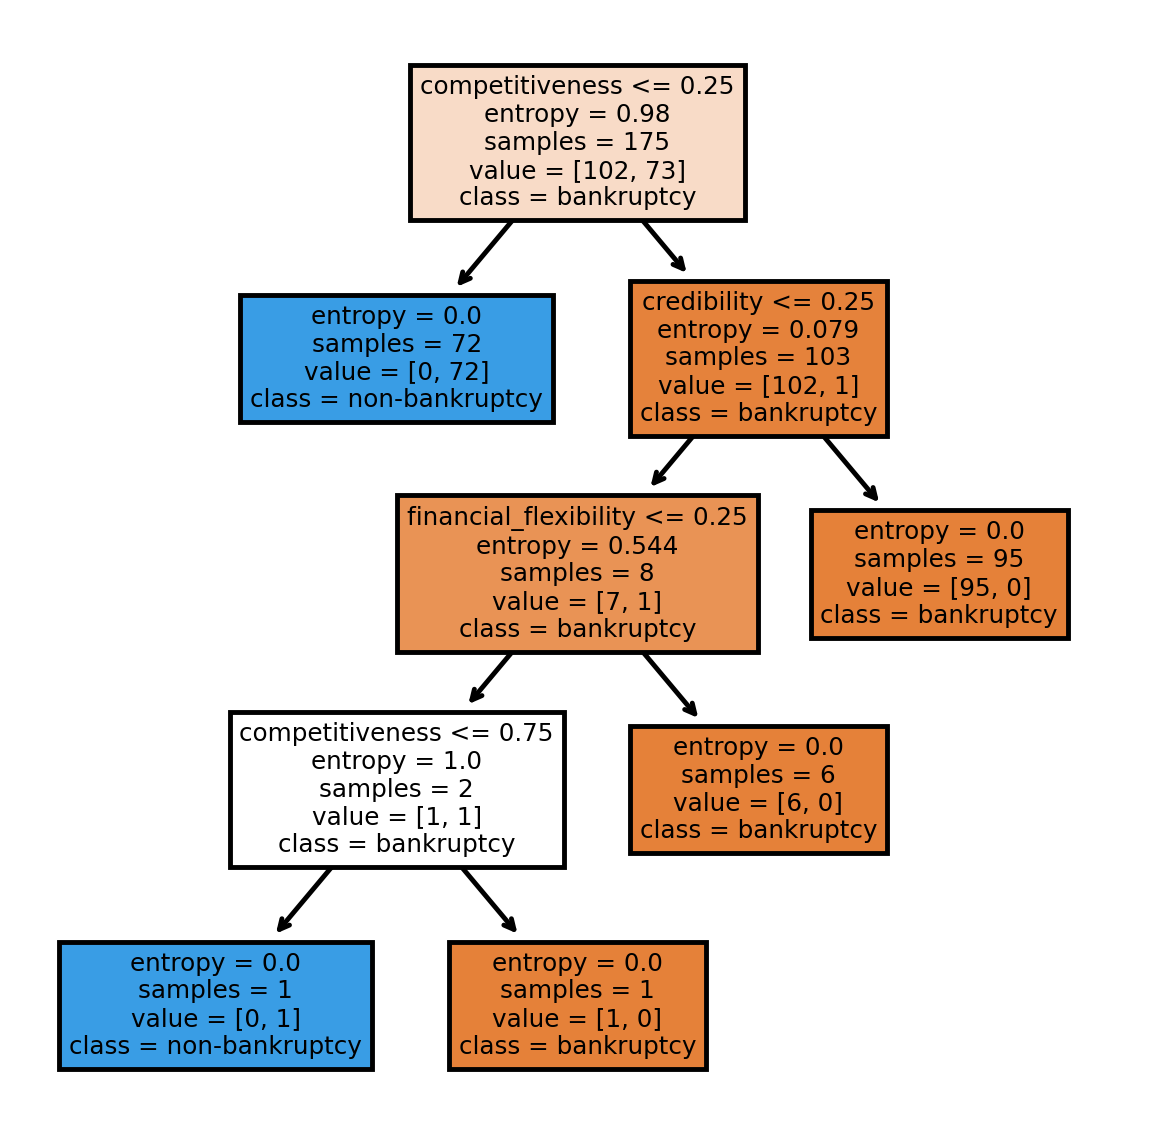

In [953]:
fn = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']
cn=['bankruptcy','non-bankruptcy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=350)
tree.plot_tree(dt,
               feature_names = fn,
               class_names=cn,
               filled = True);

#### Conclusion : we can see in this output the code visualizes a decision tree ('dt') with specific features related to industrial risk, management risk, financial flexibility, credibility, competitiveness, and operating risk, showcasing how these factors influence predictions of bankruptcy or non-bankruptcy, in a clear and colorful representation.

### Prediction on test data

In [954]:
preds = dt.predict(X_test)

In [955]:
pd.Series(preds).value_counts()

0    41
1    34
dtype: int64

### Prediction on train data

In [956]:
preds_train = dt.predict(X_train)

In [957]:
pd.crosstab(y_train,preds_train)

col_0,0,1
class_y/n,,
0,102,0
1,0,73


### Train accuracy

In [958]:
from sklearn.metrics import accuracy_score

In [959]:
accuracy_score(y_train,preds_train)

1.0

#### Conclusion:Our train model is 100% accurate.


### Checking cross table

In [960]:
pd.crosstab(y_test,preds)

col_0,0,1
class_y/n,,
0,41,0
1,0,34


### Test accuracy

In [961]:
from sklearn.metrics import accuracy_score

In [962]:
accuracy_score(y_test,preds)

1.0

#### Conclusion:Our test model is 100% accurate.

In [963]:
from sklearn.tree import DecisionTreeClassifier

### Gini

In [964]:
dt_gini = DecisionTreeClassifier(random_state=4,max_depth=4)

In [965]:
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [966]:
from sklearn import tree

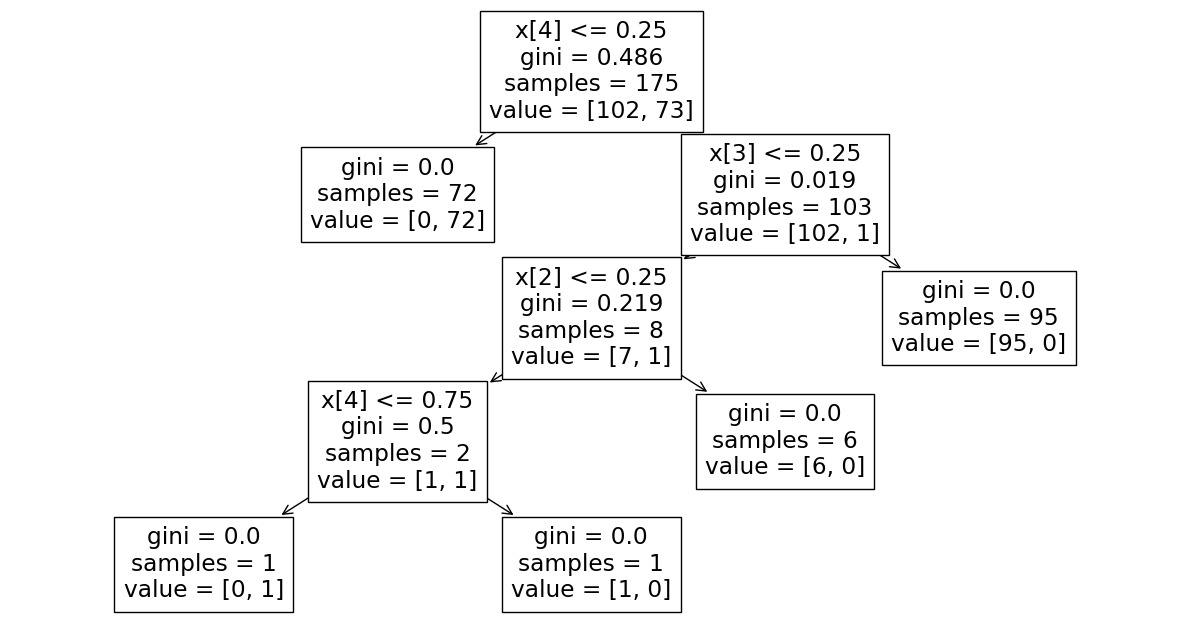

In [967]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt_gini);

In [968]:
preds_gini = dt_gini.predict(X_test)

In [969]:
preds_gini_train = dt_gini.predict(X_train)

In [970]:
accuracy_score(y_train,preds_gini_train) # training accuracy

1.0

#### Conclusion : training accuracy is 100%

In [971]:
accuracy_score(y_test,preds_gini) # testing accuracy

1.0

### Conclusion:  testing accuracy is also 100%

## Decision tree regressor

In [972]:
from sklearn.tree import DecisionTreeRegressor

In [973]:
dtr = DecisionTreeRegressor(random_state=4)

In [974]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=4)

## Data prediction for dtr

In [975]:
y_pred = dtr.predict(X_test)

In [976]:
y_pred_train = dtr.predict(X_train)

## Create model using r2_score

In [977]:
from sklearn.metrics import r2_score

In [978]:
r2_score(y_train,y_pred_train) # training accuracy

1.0

### Conclusion : Training accuracy is 100% after using r2_score

In [979]:
r2_score(y_test,y_pred) # test accuracy

1.0

### Conclusion : Testining accuracy is 100% after using r2_score

## Model 6:AdaBoost

###Importing libraries

In [980]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=20,random_state=4)
adaboost


AdaBoostClassifier(n_estimators=20, random_state=4)

###Fitting the model

In [981]:
adaboost.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=20, random_state=4)

###Predicting values

In [982]:
y_pred=adaboost.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1])

###Evaluating the model

In [983]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[41,  0],
       [ 0, 34]])

###checking accuracy of created model

In [984]:
accuracy_score(y_test,y_pred)*100

100.0

#### Conclusion:Our created model is 100% accurate

### 2.XGBOOST

In [985]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

###Fitting the model

In [986]:
xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###Predicting values

In [987]:
y_predict = xgmodel.predict(X_test)
y_predict


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1])

###Evaluating the model

In [999]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 21]])

### Test accuracy

In [989]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)


100.0


### Conclusion:Our created model is 100% accurate

## Model 7 - Random Forest

### Necessary Libraries

In [990]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report

### Initial Model

In [991]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [992]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

### GridSearchCV for hyperparameter tuning

In [993]:
# Number of trees in random forest
n_estimators = [20, 60, 100, 120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [994]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [995]:
rf1 = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf1, param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [996]:
rf_grid.best_score_

1.0

In [997]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 20}

### Random Foresr Final Model

In [998]:
rf_final = RandomForestClassifier(max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=20)
rf_final.fit(X_train,y_train)
y_pred = rf_final.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

